EDA(Exploratory Data Analysis)

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Se cargan los archivos limpios
df_homicidios = pd.read_csv("homicidios_limpio.csv")
df_lesiones = pd.read_csv("lesiones_limpio.csv")

In [108]:
df_homicidios.shape

(717, 13)

In [109]:
df_lesiones.shape

(27598, 13)

In [110]:
# Información general sobre el dataframe
print("\nInformación general sobre Homicidios:")
df_homicidios.info()



Información general sobre Homicidios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_siniestro      717 non-null    object 
 1   nro_victimas      717 non-null    int64  
 2   fecha             717 non-null    object 
 3   franja_horaria    716 non-null    float64
 4   tipo_de_calle     717 non-null    object 
 5   comuna            717 non-null    int64  
 6   longitud          717 non-null    float64
 7   latitud           717 non-null    float64
 8   vehiculo_victima  708 non-null    object 
 9   vehiculo_acusado  694 non-null    object 
 10  rol               706 non-null    object 
 11  sexo              711 non-null    object 
 12  edad              664 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 72.9+ KB


In [111]:
# Información general sobre el dataframe
print("\nInformación general sobre Lesiones:")
df_lesiones.info()


Información general sobre Lesiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_siniestro      27598 non-null  object 
 1   nro_victimas      27598 non-null  int64  
 2   fecha             27598 non-null  object 
 3   franja_horaria    27590 non-null  float64
 4   tipo_calle        14719 non-null  object 
 5   comuna            25974 non-null  float64
 6   longitud          25942 non-null  float64
 7   latitud           25942 non-null  float64
 8   vehiculo_victima  14776 non-null  object 
 9   vehiculo_acusado  9680 non-null   object 
 10  sexo              25370 non-null  object 
 11  edad              23127 non-null  float64
 12  gravedad          27598 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 2.7+ MB


In [112]:
df_homicidios['fecha'] = pd.to_datetime(df_homicidios['fecha'], errors='coerce')
df_lesiones['fecha'] = pd.to_datetime(df_lesiones['fecha'], errors='coerce')


In [113]:
# Convertir a tipo numérico con downcast a integer
df_homicidios['franja_horaria'] = pd.to_numeric(df_homicidios['franja_horaria'], errors='coerce')
df_lesiones['franja_horaria'] = pd.to_numeric(df_lesiones['franja_horaria'], errors='coerce')

df_homicidios['comuna'] = pd.to_numeric(df_homicidios['comuna'], errors='coerce')
df_lesiones['comuna'] = pd.to_numeric(df_lesiones['comuna'], errors='coerce')

df_homicidios['edad'] = pd.to_numeric(df_homicidios['edad'], errors='coerce')
df_lesiones['edad'] = pd.to_numeric(df_lesiones['edad'], errors='coerce')



In [114]:
# Lista de columnas a categorizar
categorical_columns = ['tipo_de_calle', 'vehiculo_victima', 'vehiculo_acusado', 'rol', 'sexo','gravedad']

# Iterar sobre las columnas y categorizar solo si están presentes en df_homicidios
for column in categorical_columns:
    if column in df_homicidios.columns:
        df_homicidios[column] = df_homicidios[column].astype('category')

# Iterar sobre las columnas y categorizar solo si están presentes en df_lesiones
for column in categorical_columns:
    if column in df_lesiones.columns:
        df_lesiones[column] = df_lesiones[column].astype('category')


In [115]:
# Información general sobre el dataframe
print("\nInformación general sobre Homicidios:")
df_homicidios.info()


Información general sobre Homicidios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      717 non-null    object        
 1   nro_victimas      717 non-null    int64         
 2   fecha             717 non-null    datetime64[ns]
 3   franja_horaria    716 non-null    float64       
 4   tipo_de_calle     717 non-null    category      
 5   comuna            717 non-null    int64         
 6   longitud          717 non-null    float64       
 7   latitud           717 non-null    float64       
 8   vehiculo_victima  708 non-null    category      
 9   vehiculo_acusado  694 non-null    category      
 10  rol               706 non-null    category      
 11  sexo              711 non-null    category      
 12  edad              664 non-null    float64       
dtypes: category(5), datetime64[ns](1), float6

In [116]:
# Información general sobre el dataframe
print("\nInformación general sobre Lesiones:")
df_lesiones.info()


Información general sobre Lesiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      27598 non-null  object        
 1   nro_victimas      27598 non-null  int64         
 2   fecha             27597 non-null  datetime64[ns]
 3   franja_horaria    27590 non-null  float64       
 4   tipo_calle        14719 non-null  object        
 5   comuna            25974 non-null  float64       
 6   longitud          25942 non-null  float64       
 7   latitud           25942 non-null  float64       
 8   vehiculo_victima  14776 non-null  category      
 9   vehiculo_acusado  9680 non-null   category      
 10  sexo              25370 non-null  category      
 11  edad              23127 non-null  float64       
 12  gravedad          27598 non-null  category      
dtypes: category(4), datetime64[ns](1), floa

In [117]:
# Valores nulos por columna en el dataframe Homicidios
print("\nValores faltantes en Homicidios:")
print(df_homicidios.isnull().sum())


Valores faltantes en Homicidios:
id_siniestro         0
nro_victimas         0
fecha                0
franja_horaria       1
tipo_de_calle        0
comuna               0
longitud             0
latitud              0
vehiculo_victima     9
vehiculo_acusado    23
rol                 11
sexo                 6
edad                53
dtype: int64


In [118]:
# Valores nulos por columna en el dataframe Lesiones
print("\nValores faltantes en Lesiones:")
print(df_lesiones.isnull().sum())


Valores faltantes en Lesiones:
id_siniestro            0
nro_victimas            0
fecha                   1
franja_horaria          8
tipo_calle          12879
comuna               1624
longitud             1656
latitud              1656
vehiculo_victima    12822
vehiculo_acusado    17918
sexo                 2228
edad                 4471
gravedad                0
dtype: int64


Homicidios:
En el dataframe de homicidios, se observa que hay valores faltantes. La columna "franja_horaria" tiene un valor nulo, así como las columnas relacionadas con los vehículos involucrados ("vehiculo_victima" y "vehiculo_acusado"), el rol de las personas involucradas ("rol"), información sobre el género ("sexo"), y la edad de las víctimas ("edad"). La presencia de estos valores nulos puede deberse a diversas razones, como errores en la recopilación de datos, omisiones intencionadas o simplemente la falta de información en ciertos casos.

Lesiones:
En el dataframe de lesiones, se identifican valores faltantes en las columnas relacionadas con la ubicación geográfica ("longitud" y "latitud"), información sobre los vehículos ("vehiculo_victima" y "vehiculo_acusado"), la comuna, la tipo de calle y la franja horaria.

Cada columna en el conjunto de datos puede contener información valiosa sobre el accidente. Eliminar columnas con valores nulos puede resultar en la pérdida de datos críticos que podrían contribuir a comprender la dinámica del accidente, las condiciones en las que ocurrió y otros factores relevantes. Tambien se podrían introducir sesgos en el análisis, ya que los datos restantes podrían no representar de manera precisa la realidad de los accidentes de tráfico. Este sesgo podría afectar las conclusiones y recomendaciones derivadas del análisis.

In [119]:
# Identificar registros duplicados en el dataframe de homicidios
duplicados_homicidios = df_homicidios[df_homicidios.duplicated()]

# Mostrar los registros duplicados en el dataframe de homicidios
print("Registros duplicados en Homicidios:")
print(duplicados_homicidios)



Registros duplicados en Homicidios:
Empty DataFrame
Columns: [id_siniestro, nro_victimas, fecha, franja_horaria, tipo_de_calle, comuna, longitud, latitud, vehiculo_victima, vehiculo_acusado, rol, sexo, edad]
Index: []


In [120]:
# Identificar registros duplicados en el dataframe de lesiones
duplicados_lesiones = df_lesiones[df_lesiones.duplicated()]
columnas_duplicados_lesiones = duplicados_lesiones["id_siniestro"]

# Mostrar solo la columna de registros duplicados en Lesiones
print("\nRegistros duplicados en Lesiones:")
columnas_duplicados_lesiones


Registros duplicados en Lesiones:


79       LC-2019-0006638
95       LC-2019-0008238
101      LC-2019-0008388
118      LC-2019-0008860
131      LC-2019-0009807
              ...       
27194    LC-2021-0628972
27195    LC-2021-0628972
27265    LC-2021-0631292
27268    LC-2021-0631295
27311    LC-2021-0633935
Name: id_siniestro, Length: 639, dtype: object

In [121]:
lesiones_consulta = "LC-2019-0009807"
consulta_resultados = df_lesiones[df_lesiones['id_siniestro'] == lesiones_consulta]
consulta_resultados

,id_siniestro,nro_victimas,fecha,franja_horaria,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,sexo,edad,gravedad
130,LC-2019-0009807,2,2019-01-05,20.0,NaN,9.0,-58.465951,-34.658307,NaN,NaN,masculino,40.0,leve
131,LC-2019-0009807,2,2019-01-05,20.0,NaN,9.0,-58.465951,-34.658307,NaN,NaN,masculino,40.0,leve


In [122]:
# Hacemos una segunda consulta para comprobar que los duplicados se deben a que en el accidente hay mas de una victima
lesiones_consulta = "LC-2021-0631295"
consulta_resultados = df_lesiones[df_lesiones['id_siniestro'] == lesiones_consulta]
consulta_resultados

,id_siniestro,nro_victimas,fecha,franja_horaria,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,sexo,edad,gravedad
27266,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,masculino,52.0,leve
27267,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,femenino,50.0,leve
27268,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,femenino,50.0,leve
27269,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,masculino,36.0,leve
27270,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,masculino,9.0,leve
27271,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,masculino,50.0,leve


Los valores duplicados en la columna "id_siniestro" se deben a que hay más de una víctima por siniestro, y cada víctima tiene una fila distinta con el mismo "id_siniestro", por ende procederemos a agregarle un 'id_victima' para poder diferenciar las filas.

In [123]:
# Agregar una nueva columna para el identificador único de la víctima
df_lesiones['id_victima'] = df_lesiones.groupby('id_siniestro').cumcount() + 1

# Mostrar el DataFrame resultante
df_lesiones.head()

,id_siniestro,nro_victimas,fecha,franja_horaria,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,sexo,edad,gravedad,id_victima
0,LC-2019-0000179,1,2019-01-01,9.0,NaN,14.0,-58.408911,-34.559658,ciclista,NaN,NaN,NaN,leve,1
1,LC-2019-0000053,1,2019-01-01,1.0,NaN,8.0,-58.443510,-34.669125,auto,NaN,masculino,57.0,leve,1
2,LC-2019-0000063,1,2019-01-01,2.0,NaN,8.0,-58.468335,-34.677556,NaN,NaN,NaN,NaN,leve,1
3,LC-2019-0000079,1,2019-01-01,2.0,NaN,7.0,-58.437425,-34.647349,peaton,NaN,masculino,NaN,leve,1
4,LC-2019-0000082,4,2019-01-01,4.0,NaN,3.0,-58.398225,-34.604579,auto,NaN,masculino,45.0,leve,1


In [124]:
# Se identifican y contar los registros duplicados en df_lesiones
cantidad_duplicados_lesiones = df_lesiones.duplicated().sum()

# Se muestra la cantidad de registros duplicados
print(f"Cantidad de registros duplicados en df_lesiones: {cantidad_duplicados_lesiones}")

Cantidad de registros duplicados en df_lesiones: 0


In [125]:
# Información estadística
print("Estadísticas de df_homicidios:")
print(df_homicidios.describe())




Estadísticas de df_homicidios:
       nro_victimas                          fecha  franja_horaria  \
count    717.000000                            717      716.000000   
mean       1.061367  2018-09-09 01:24:21.087866112       11.554469   
min        1.000000            2016-01-01 00:00:00        0.000000   
25%        1.000000            2017-04-01 00:00:00        6.000000   
50%        1.000000            2018-07-07 00:00:00       11.000000   
75%        1.000000            2019-12-18 00:00:00       17.000000   
max        3.000000            2021-12-30 00:00:00       23.000000   
std        0.257024                            NaN        6.700055   

           comuna    longitud     latitud        edad  
count  717.000000  717.000000  717.000000  664.000000  
mean     7.454672  -58.407853  -34.653263   42.167169  
min      1.000000  -58.529942  -58.439153    1.000000  
25%      4.000000  -58.477440  -34.644467   27.000000  
50%      8.000000  -58.444513  -34.623309   37.000000  
75

In [126]:
print("\nEstadísticas de df_lesiones:")
print(df_lesiones.describe())


Estadísticas de df_lesiones:
       nro_victimas                       fecha  franja_horaria        comuna  \
count  27598.000000                       27597    27590.000000  25974.000000   
mean       1.422494  2020-05-27 16:24:09.548864       13.546212      7.943289   
min        1.000000         2019-01-01 00:00:00        0.000000      1.000000   
25%        1.000000         2019-07-13 00:00:00       10.000000      4.000000   
50%        1.000000         2020-03-17 00:00:00       14.000000      8.000000   
75%        1.000000         2021-04-05 00:00:00       18.000000     12.000000   
max       16.000000         2021-12-31 00:00:00       23.000000     15.000000   
std        1.087866                         NaN        5.596457      4.549405   

           longitud       latitud          edad    id_victima  
count  2.594200e+04  2.594200e+04  23127.000000  27598.000000  
mean  -2.247891e+05 -1.339060e+05     37.725689      1.211247  
min   -5.829963e+09 -3.472891e+09      0.000000 

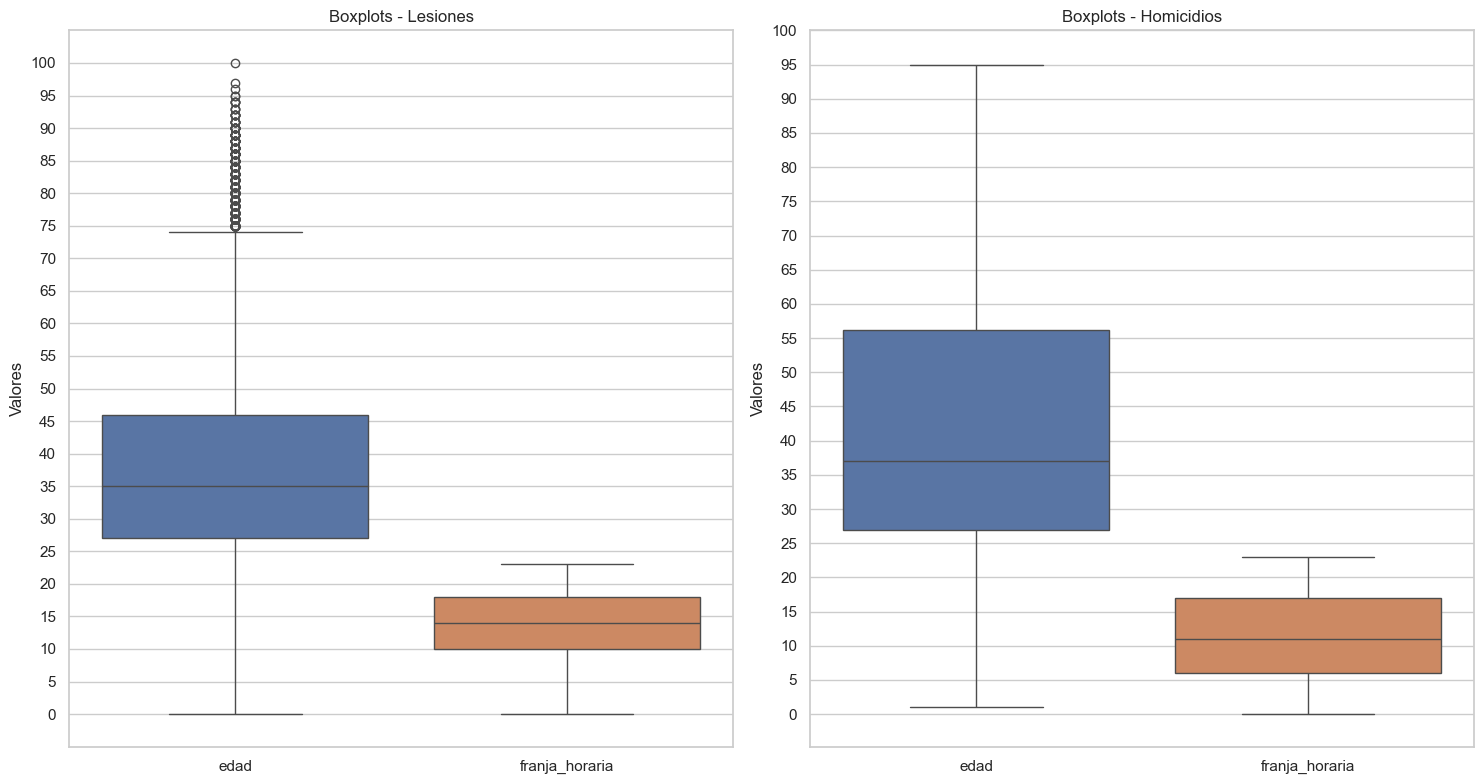

In [127]:
# Se crean subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Boxplot para df_lesiones
sns.boxplot(data=df_lesiones[[ 'edad','franja_horaria']], ax=axes[0])
axes[0].set_title('Boxplots - Lesiones')
axes[0].set_ylabel('Valores')

# Se ajustan el número de ticks en el eje y
axes[0].set_yticks(range(0, 101, 5)) 

# Boxplot para df_homicidios
sns.boxplot(data=df_homicidios[[ 'edad','franja_horaria' ]], ax=axes[1])
axes[1].set_title('Boxplots - Homicidios')
axes[1].set_ylabel('Valores')

# Se ajustan el número de ticks en el eje y
axes[1].set_yticks(range(0, 101, 5))  

# Ajustar el diseño
plt.tight_layout()
plt.show()


Análisis Comparativo entre Incidentes de Lesiones y Homicidios:

Cantidad de Víctimas:
En los incidentes de lesiones, la cantidad promedio de víctimas es mayor (1.42) en comparación con los homicidios (1.06). El incidente con mayor cantidad de víctimas ocurrió en el contexto de lesiones, donde hubo hasta 16 personas afectadas, mientras que en homicidios, la cifra máxima fue de 3 víctimas.

Franja Horaria:
La franja horaria promedio en la que ocurren incidentes de lesiones es alrededor de las 11:33 
a.m, mientras que para homicidios es a las 13:33 hs.


Edad de las Víctimas:
La edad promedio de las víctimas en incidentes de lesiones es de 37.73 años, mientras que en homicidios es de 42.17 años. Ambos tipos de incidentes muestran una variabilidad considerable en las edades, con un rango desde 1 hasta 100 años.



ACCIDENTES POR COMUNA

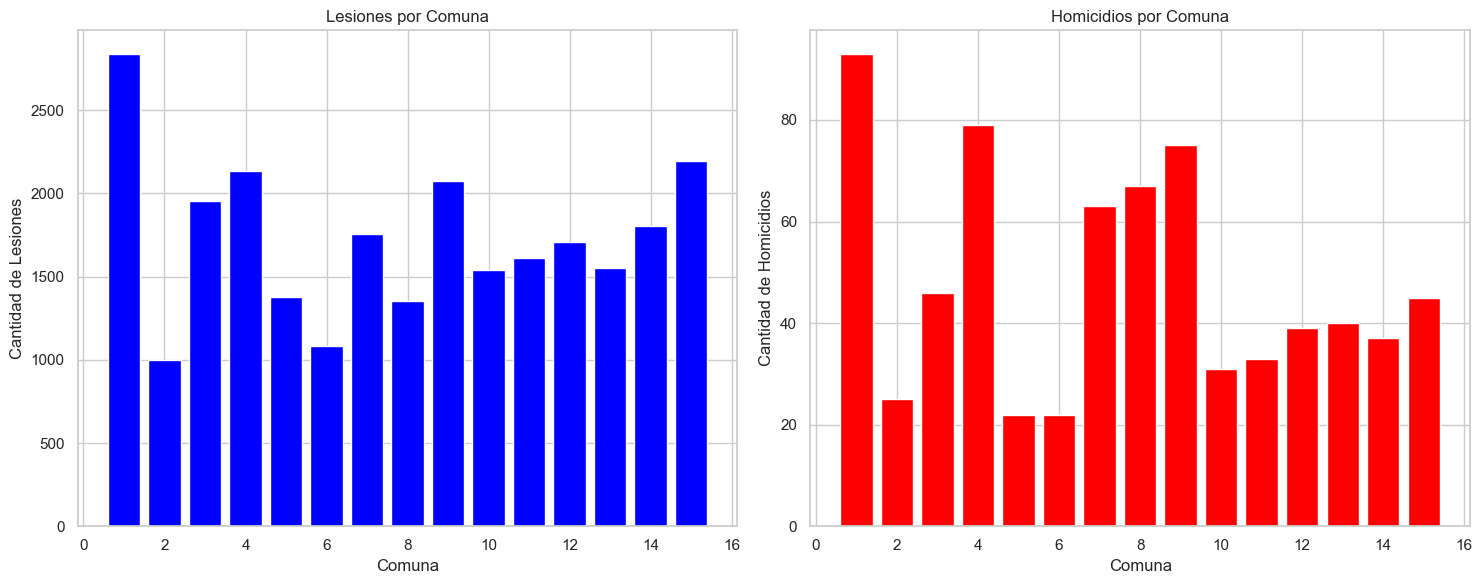

In [128]:
# Se crea un DataFrame que contenga la cantidad de accidentes por comuna en df_lesiones
lesiones_por_comuna = df_lesiones['comuna'].value_counts().reset_index()
lesiones_por_comuna.columns = ['comuna', 'cantidad_lesiones']

# Se crea un DataFrame que contenga la cantidad de accidentes por comuna en df_homicidios
homicidios_por_comuna = df_homicidios['comuna'].value_counts().reset_index()
homicidios_por_comuna.columns = ['comuna', 'cantidad_homicidios']

# Se unen ambos DataFrames en base a la comuna
df_comparacion_comunas = lesiones_por_comuna.merge(homicidios_por_comuna, on='comuna', how='outer')

# Se ordenan el DataFrame por comuna
df_comparacion_comunas = df_comparacion_comunas.sort_values(by='comuna')

# Se crean los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Barra para lesiones
axs[0].bar(df_comparacion_comunas['comuna'], df_comparacion_comunas['cantidad_lesiones'], color='blue')
axs[0].set_title('Lesiones por Comuna')
axs[0].set_xlabel('Comuna')
axs[0].set_ylabel('Cantidad de Lesiones')

# Barra para homicidios
axs[1].bar(df_comparacion_comunas['comuna'], df_comparacion_comunas['cantidad_homicidios'], color='red')
axs[1].set_title('Homicidios por Comuna')
axs[1].set_xlabel('Comuna')
axs[1].set_ylabel('Cantidad de Homicidios')


plt.tight_layout()


plt.show()



Al examinar la información recopilada de accidentes de tráfico en la ciudad, se destaca que la Comuna 1 presenta la mayor incidencia de incidentes, tanto en términos de lesionados como de víctimas fatales.

DISTRIBUCION DE LESIONES POR AÑO

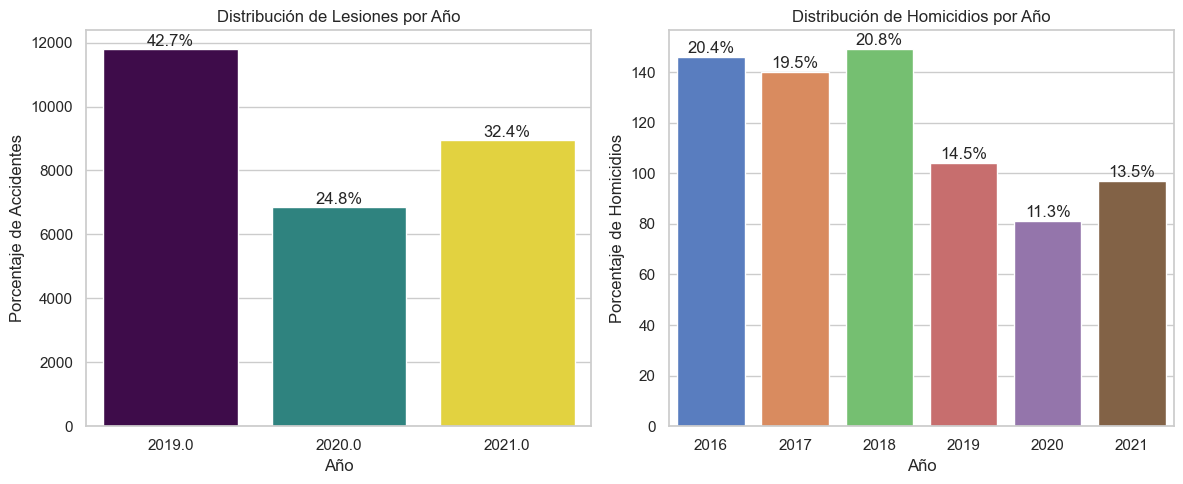

In [129]:
plt.figure(figsize=(12, 5))

# Gráfico de barras para df_lesiones con porcentajes
plt.subplot(1, 2, 1)
total_lesiones = len(df_lesiones)
sns.countplot(x=df_lesiones['fecha'].dt.year, hue=df_lesiones['fecha'].dt.year, palette='viridis', legend=False)
plt.title('Distribución de Lesiones por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Accidentes')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5,
                   f'{height/total_lesiones:.1%}', ha='center', va='bottom')

# Gráfico de barras para df_homicidios con porcentajes
plt.subplot(1, 2, 2)
total_homicidios = len(df_homicidios)
sns.countplot(x=df_homicidios['fecha'].dt.year, hue=df_homicidios['fecha'].dt.year, palette='muted', legend=False)
plt.title('Distribución de Homicidios por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Homicidios')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5,
                   f'{height/total_homicidios:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()




En la distribución de lesiones por año, solo tenemos datos del año 2019,2020 y 2021 y vemos que el 2019 es el año con mas victimas de lesiones por accidentes con 42.7%, en cambio de homicidios tenemos datos desde el 2016 al 2021 y vemos que el año con mayores muertes por accidentes es en el 2018 con 20.4% y lo siguen los años 2016 (20.4%) y el 2017 (19.5%) . En ambos graficos se puede ver que el año con menos victimas es en 2020, probablemente haya sido por el confinamiento.

ACCIDENTES POR TIPO DE CALLE

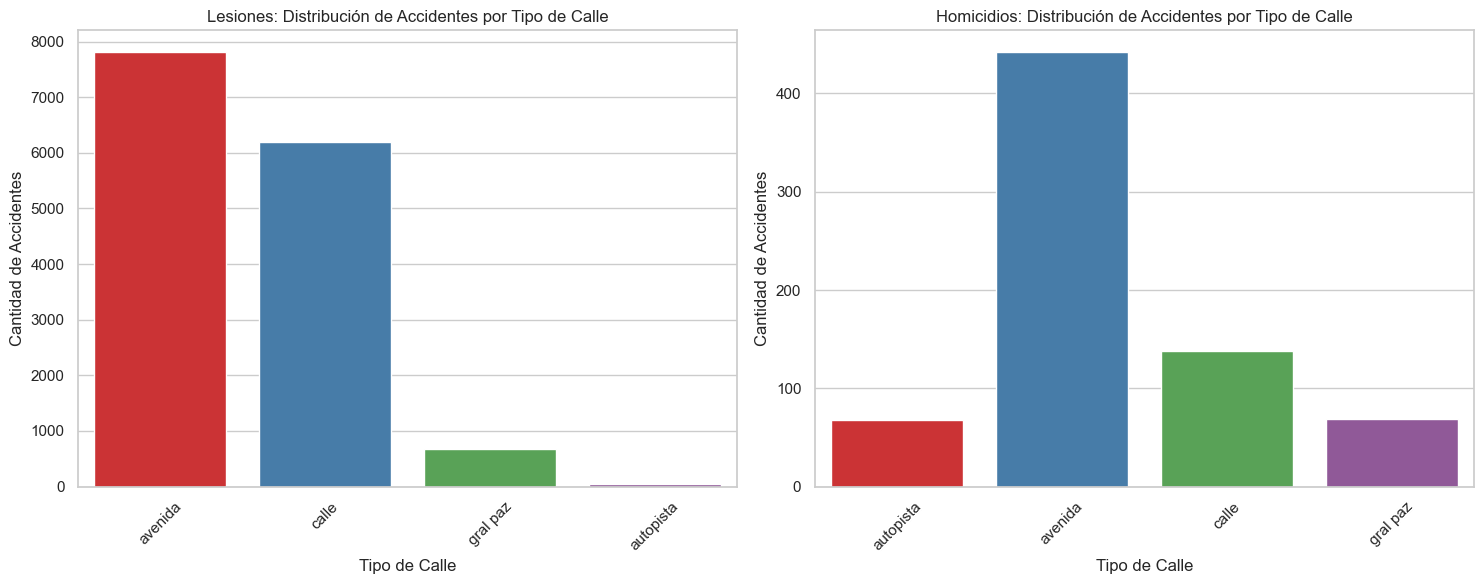

In [130]:
sns.set(style="whitegrid")

# Se crean subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico para Lesiones
sns.countplot(x='tipo_calle', data=df_lesiones, ax=axes[0], palette='Set1', hue=df_lesiones['tipo_calle'], legend=False)
axes[0].set_title('Lesiones: Distribución de Accidentes por Tipo de Calle')
axes[0].set_xlabel('Tipo de Calle')
axes[0].set_ylabel('Cantidad de Accidentes')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico para Homicidios
sns.countplot(x='tipo_de_calle', data=df_homicidios, ax=axes[1], palette='Set1', hue=df_homicidios['tipo_de_calle'], legend=False)
axes[1].set_title('Homicidios: Distribución de Accidentes por Tipo de Calle')
axes[1].set_xlabel('Tipo de Calle')
axes[1].set_ylabel('Cantidad de Accidentes')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Los siniestros, tanto fatales como no fatales, tienen lugar predominantemente en avenidas, seguidas por calles . No obstante, al analizar específicamente los accidentes fatales, las avenidas destacan de manera significativa.

SINIESTROS POR FRANJA HORARIA

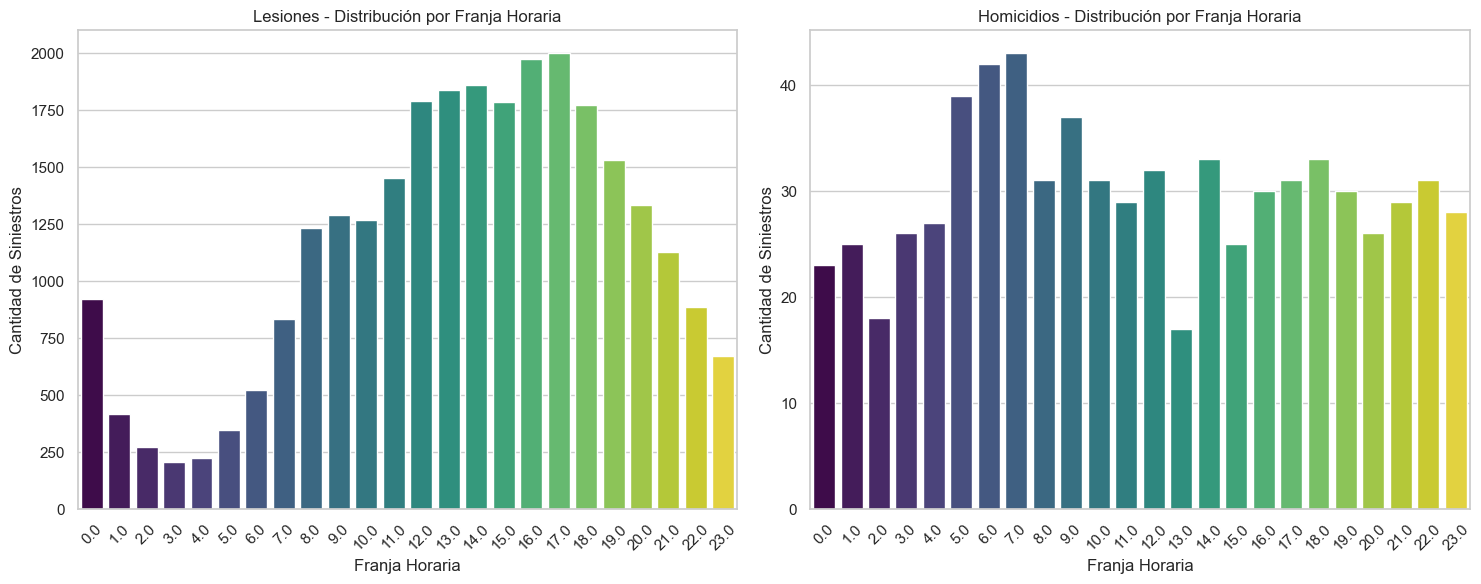

In [131]:
# Se crea los gráficos de barras uno al lado del otro
plt.figure(figsize=(15, 6))

# Gráfico de lesiones por franja horaria
plt.subplot(1, 2, 1)
sns.countplot(x='franja_horaria', data=df_lesiones, palette='viridis', hue=df_lesiones['franja_horaria'], legend=False)
plt.title('Lesiones - Distribución por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)

# Gráfico de homicidios por franja horaria
plt.subplot(1, 2, 2)
sns.countplot(x='franja_horaria', data=df_homicidios, palette='viridis', hue=df_homicidios['franja_horaria'], legend=False)
plt.title('Homicidios - Distribución por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


En estos dos graficos podemos ver que la hora en que menos lesiones hay por siniestros es entre la 01:00 y las 06:00 de la mañana, en cambio en los accidentes fatales vemos que las horas mas propensas son entre las 05:00 a las 07:00 de la mañana. Desde las 12:00 del mediodia a las 18:00 es la franja horaria donde mas lesionados hay por accidentes, y a las 02:00 de la mañana y a las 13:00 podemos ver que son las horas en el que menos fallecidos hay. 

LESIONES POR GENERO

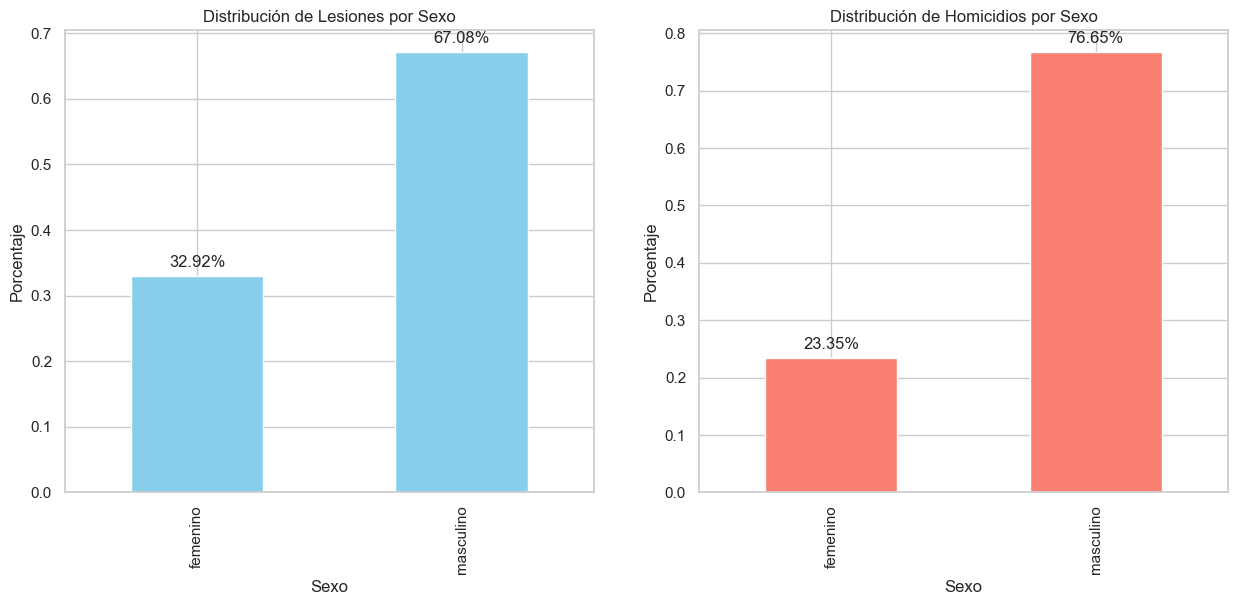

In [132]:

sns.set(style="whitegrid")

# Se crean subgráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico para Lesiones por Sexo
lesiones_sex_plot = df_lesiones['sexo'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Lesiones por Sexo')
axes[0].set_ylabel('Porcentaje')
axes[0].set_xlabel('Sexo')

# Se muestran los porcentajes en las barras
for p in lesiones_sex_plot.patches:
    lesiones_sex_plot.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Gráfico para Homicidios por Sexo
homicidios_sex_plot = df_homicidios['sexo'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribución de Homicidios por Sexo')
axes[1].set_ylabel('Porcentaje')
axes[1].set_xlabel('Sexo')

# Se muestran los porcentajes en las barras
for p in homicidios_sex_plot.patches:
    homicidios_sex_plot.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Tanto para lesionados y victimas fatales el porcentaje de hombres (masculino) afectados es de 67% y 76.6% respectivamente. Si bien esto pareciera que las mujeres (femenino) sufren menos accidentes, hay que tener en cuenta que en Argentina el porcentaje de las mismas con licencia es de 35% (Segun informe emitido por seguridad vial; fuente adjunta a continuacion).


https://www.argentina.gob.ar/sites/default/files/2018/12/ansv_informe-con-perspectiva-de-genero-en-argentina-marzo-2023.pdf


In [133]:
df_homicidios['gravedad'] = 'fatal'

In [134]:
# Se agrega una nueva columna para el identificador único de la víctima
df_homicidios['id_victima'] = df_homicidios.groupby('id_siniestro').cumcount() + 1

# Se muestra el DataFrame resultante
df_homicidios.head()

,id_siniestro,nro_victimas,fecha,franja_horaria,tipo_de_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,id_victima
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal,1
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal,1
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal,1
3,2016-0004,1,2016-01-10,0.0,avenida,8,-58.465039,-34.680930,moto,NaN,conductor,masculino,18.0,fatal,1
4,2016-0005,1,2016-01-21,5.0,avenida,1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29.0,fatal,1


In [135]:
# Se concatenan los dos DataFrames verticalmente 

siniestros = pd.concat([df_homicidios, df_lesiones], ignore_index=True)

print(siniestros.shape) 

(28315, 16)


In [136]:
siniestros

,id_siniestro,nro_victimas,fecha,franja_horaria,tipo_de_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,id_victima,tipo_calle
0,2016-0001,1,2016-01-01,4.0,avenida,8.0,-5.847534e+01,-3.468757e+01,moto,auto,conductor,masculino,19.0,fatal,1,NaN
1,2016-0002,1,2016-01-02,1.0,gral paz,9.0,-5.850878e+01,-3.466978e+01,auto,pasajeros,conductor,masculino,70.0,fatal,1,NaN
2,2016-0003,1,2016-01-03,7.0,avenida,1.0,-5.839040e+01,-3.463189e+01,moto,auto,conductor,masculino,30.0,fatal,1,NaN
3,2016-0004,1,2016-01-10,0.0,avenida,8.0,-5.846504e+01,-3.468093e+01,moto,NaN,conductor,masculino,18.0,fatal,1,NaN
4,2016-0005,1,2016-01-21,5.0,avenida,1.0,-5.838718e+01,-3.462247e+01,moto,pasajeros,conductor,masculino,29.0,fatal,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28310,LC-2021-0652865,2,2021-12-31,19.0,NaN,9.0,-5.848833e+01,-3.464175e+01,NaN,NaN,NaN,masculino,28.0,leve,1,avenida
28311,LC-2021-0652865,2,2021-12-31,19.0,NaN,9.0,-5.848833e+01,-3.464175e+01,NaN,NaN,NaN,masculino,52.0,leve,2,avenida
28312,LC-2021-0652907,1,2021-12-31,20.0,NaN,1.0,-5.838289e+01,-3.458308e+01,NaN,NaN,NaN,masculino,23.0,leve,1,NaN
28313,LC-2021-0652921,1,2021-12-31,22.0,NaN,5.0,-5.841453e+01,-3.461429e+01,moto,transporte publico,NaN,masculino,31.0,grave,1,calle


In [137]:
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28315 entries, 0 to 28314
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      28315 non-null  object        
 1   nro_victimas      28315 non-null  int64         
 2   fecha             28314 non-null  datetime64[ns]
 3   franja_horaria    28306 non-null  float64       
 4   tipo_de_calle     717 non-null    category      
 5   comuna            26691 non-null  float64       
 6   longitud          26659 non-null  float64       
 7   latitud           26659 non-null  float64       
 8   vehiculo_victima  15484 non-null  object        
 9   vehiculo_acusado  10374 non-null  object        
 10  rol               706 non-null    category      
 11  sexo              26081 non-null  category      
 12  edad              23791 non-null  float64       
 13  gravedad          28315 non-null  object        
 14  id_victima        2831

In [138]:
# Se agrega una nueva columna para el identificador único de la víctima
siniestros['id_victima'] = siniestros.groupby('id_siniestro').cumcount() + 1

# Se muestra el DataFrame resultante
siniestros.head()

,id_siniestro,nro_victimas,fecha,franja_horaria,tipo_de_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,id_victima,tipo_calle
0,2016-0001,1,2016-01-01,4.0,avenida,8.0,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal,1,NaN
1,2016-0002,1,2016-01-02,1.0,gral paz,9.0,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal,1,NaN
2,2016-0003,1,2016-01-03,7.0,avenida,1.0,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal,1,NaN
3,2016-0004,1,2016-01-10,0.0,avenida,8.0,-58.465039,-34.680930,moto,NaN,conductor,masculino,18.0,fatal,1,NaN
4,2016-0005,1,2016-01-21,5.0,avenida,1.0,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29.0,fatal,1,NaN


In [139]:
siniestros.to_csv('siniestros.csv',index = False)